# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
# Basic pandas and numpy
import pandas as pd
import numpy as np
 
# Basic visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# Scipy stats:
from scipy import stats

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
len(x_values) == len(y_values)

True

In [3]:
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

Draw a dispersion diagram (scatter plot) for the data.

In [4]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


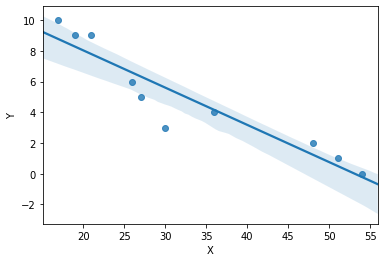

In [5]:
sns.regplot(data=student_data, x='X', y='Y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [6]:
# It seems to be a negative correlation between the two variables.
# The younger the student, the more prone to tardiness.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
covariance = np.cov(student_data.X, student_data.Y)[0][1]
print(covariance)

-45.56666666666666


In [8]:
correlation = np.corrcoef(student_data.X, student_data.Y)[0][1]
print(correlation)

-0.9391626886887122


In [9]:
# In both cases, the coefficient is negative, hence meaning that both variables are inversely affected.
# Correlation coefficient gives us an idea that both variables are correlated (lineal relation), strongly (close to 1), and inversely (negative)
# When the greater values of one variable mainly correspond to the lesser values of the other, the covariance is negative.
# Although the magnitude of the variance is difficult to be interpreted, as it is out of range of one of the variables and on the upper part of the other one (age),
# I found it to be quite high.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data.X, student_data.Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [11]:
import statsmodels.api as sm
Y = student_data.Y
X = student_data.X
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [12]:
# What will be your outcome variable? 
# Y = dependent variable = Number of tardies.

# What type of regression are you using? 
# Univariate (age) linear (quantitative data) regression.

Plot your regression model on your scatter plot.

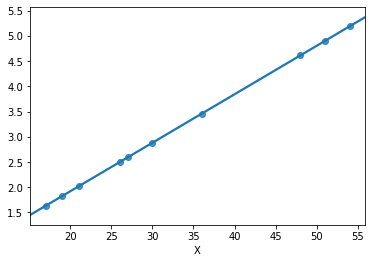

In [13]:
sns.regplot(x=X, y=predictions)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [14]:
results.summary()

/home/eiroamd/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              4.375
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                      0.0660
Time:                        16:55:16   Log-Likelihood:                         -30.028
No. Observations:                  10   AIC:                                      62.06
Df Residuals:                       9   BIC:                                      62.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.0961      0.046      2.092      0.066      -0.008       0.200
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.718
Skew:                           0.002   Prob(JB):                        0.698
Kurtosis:                       1.687   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# R2 is not really close to 1.
# The correlation coefficient is close to 0 which does not represent a lot of correlation.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [16]:
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
vehicles[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corr()['CO2 Emission Grams/Mile']

CO2 Emission Grams/Mile    1.000000
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [18]:
# The most positively correlated variables are Fuel Barrels/Year and Fuel Cost/Year.
# The most negatively correlated variable is Combined MPG.
# Year does not seem to be correlated.

In [19]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
Y = vehicles['CO2 Emission Grams/Mile']
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [21]:
# Multivariate linear regression

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [22]:
# To print the summary:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Tue, 10 Sep 2019   Prob (F-statistic):                        0.00
Time:                             16:55:16   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# What are the most important varibles in your model and why?
# By far, Fuel Barrels/Year
# What can conclusions can you draw from your model and how confident in these conclusions are you?
# R2 is quite high (almost 1), hence the quality of the model is good

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [24]:
x_values = [1, 3, 4, 6, 8, 9, 11, 14]
y_values = [1, 2, 4, 4, 5, 7, 8, 13]

In [25]:
attendance_data = pd.DataFrame({'X': x_values, 'Y': y_values})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

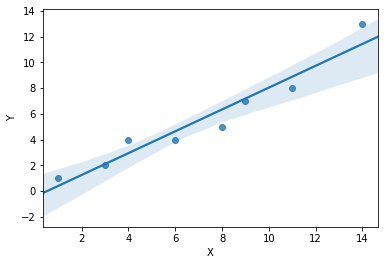

In [26]:
sns.regplot(data=attendance_data, x='X', y='Y')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [27]:
# It seems to be a positive linear correlation between the two variables.
# There was a party where the 4 people invited did not attend.

In [28]:
Y = attendance_data.Y
X = attendance_data.X
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
results.summary()

/home/eiroamd/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                    4.20e-07
Time:                        16:55:16   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.8015      0.045     17.895      0.000       0.696       0.907
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                           0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Strong R2 and coefficient. Good model.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

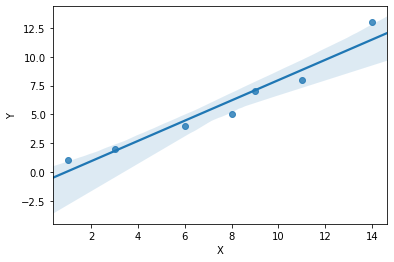

In [30]:
x_values = [1, 3, 6, 8, 9, 11, 14]
y_values = [1, 2, 4, 5, 7, 8, 13]
attendance_data = pd.DataFrame({'X': x_values, 'Y': y_values})
sns.regplot(data=attendance_data, x='X', y='Y')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [31]:
Y = attendance_data.Y
X = attendance_data.X
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              287.4
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                    2.69e-06
Time:                        16:55:16   Log-Likelihood:                         -9.7838
No. Observations:                   7   AIC:                                      21.57
Df Residuals:                       6   BIC:                                      21.51
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.7953      0.047     16.951      0.000       0.680       0.910
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.413
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.466
Skew:                           1.104   Prob(JB):                        0.480
Kurtosis:                       3.384   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Not a lot of changes.